# Outlier detection : fraud detection

This notebook is an introduction to outlier detection in Python. It presents some of the most basic and used techniques.

The studied use case is **credit card fraud**, a well known problem in outlier detection domain. Credit card usage has significantly increased in recent years. A small part of these transactions are fraudulent and billions of euros are stolen every year.

We will use in this notebook the following popular dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud

<h3> Author: </h3>
<h4><font color="blue">Issame SARROUKH</font></h4>

# Introduction


## Data description


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('creditcard.csv')
df['Norm_amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Norm_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


## Select a subset of the dataset 

In [2]:
# We chose 50,000 samples, in order to have a better detection of anomalies. 
df_sample = df.sample(n=50000, random_state=0).copy() 

In [3]:
# Imbalanced dataset
df_sample['Class'].value_counts(normalize=True) 

0    0.99816
1    0.00184
Name: Class, dtype: float64

# Methods

## Supervised methods

### Random Forest

- We use the Random Forest algorithm (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to train a classifier able to detect frauds, on 80% of the dataset.
- We perform predictions on the 20% remaining of the dataset.
- We visualize results on a confusion matrix (compare predictions and true labels). 
- We compute accuracy, precision, recall and f1 scores.

The random forest, as the name implies, consists of a large number of individual decision trees that function as an ensemble. Each individual tree in the random forest makes a class prediction and the class with the most votes becomes the prediction for our model.

We define the most important parameters for random forest tuning:

- <b>n_estimators:</b> one of the most important parameters is the number of trees in the forest, it does not affect the performance of the model if increased, but it does affect the computation time.

- <b>min_sample_split:</b> A parameter that tells the decision tree in a random forest the minimum required number of observations in a given node in order to split it. By increasing the value of min_sample_split , we can reduce the number of splits that occur in the decision tree and thus prevent the model from overfitting.

- <b>max_features:</b> The number of features considered for splitting at each leaf node, usually taken equal to the root number of observations, we take the default setting. 

- <b>critereon:</b> The function to measure the quality of a data split or splitting according to the terms of an attribute at nodes. The criteria supported are "gini" for Gini impurity and "entropy" for information gain.

- <b>max_depth:</b> The maximum depth of each tree, if this parameter increases, the performance of the model increases, however, this can have a detrimental effect, as it can lead to overfitting of the training and the model does not generalize its predictions well however remain more complex and fit the training data better.

- <b>max_leaf_nodes:</b> This hyperparameter defines a condition on the splitting of the nodes and thus limits the growth of the tree. If, after splitting, we have more terminal nodes than the specified number of terminal nodes, splitting stops and the tree will no longer grow.

- <b>class_weight: </b> The weight given to each class, we increase the weight given to the fraud class. 

In [157]:

from sklearn.ensemble import RandomForestClassifier 
from utils import split 


X_train, X_test, y_train, y_test = split(df_sample)

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, criterion="gini",
                             max_depth=10, min_samples_split=2, min_samples_leaf=1, class_weight={0:1, 1:9900})  
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 9900}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [158]:
# Perform predictions on the test set 
y_pred = clf.predict(X_test) 

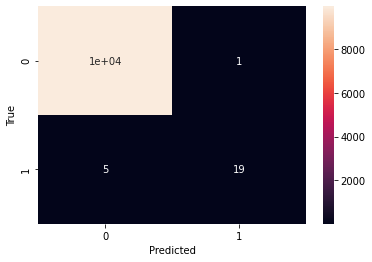

In [159]:
from utils import cf_matrix

cf_matrix(y_test, y_pred) 

In [160]:
from utils import clf_report
clf_report(y_test, y_pred)



Accuracy :  0.9994
Precision : 0.95
Recall : 0.7916666666666666
F1 :  0.8636363636363635


The results are satisfactory with the choice of parameters, and the model has a very good score even by modifying the random state, the algorithm detects 95% of the anomalies, with a recall of 79%, the model, allows to detect the frauds well, it is possible to increase even more the weight of the class of anomaly, in order to achieve an improvement of the fraud detection.

## Unsupervised methods

### Statistical methods

We first try to identify frauds by looking at the `Amount` feature only.

Z-score is defined as : $Z = \frac{X-\bar{X}}{\sigma}$

It evaluates how many standard deviations below or above the mean a value is.

1. We plot the distribution of the `Amount` feature.

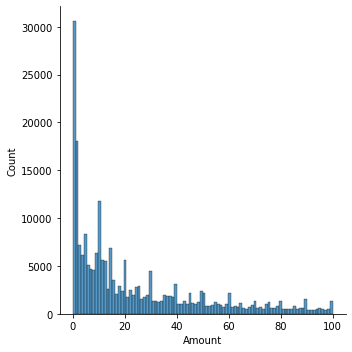

In [ ]:
import seaborn as sns
sns.displot(x=df[df.Amount < 100]["Amount"])

2. we can't we use the Z-score here

We cannot use the Z-score method, because the distribution of the variable Amount has a positive skew, the data is not normal, we need to normalize the variable and this is possible with boxcox or log1p. The Z-score on a single variable is not sufficient to qualify a transaction as fraudulent. 

### Proximity/Distance based methods

#### KNN


- We use the `sklearn.neighbors.NearestNeighbors` (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) method to compute the mean distance of each instance to its k=5 neighbors (you can try different k later).  
- We plot the distribution of the distances and select a threshold t such as when the distance is greater than t, the corresponding instance is an anomaly.
- We visualize the results on a confusion matrix

 In KNN and for classification, an observation is classified by a vote of its neighbors, thus, the observation is assigned to the most common class among its k nearest neighbors. In this case, KNN is used for unsupervised learning. The algorithm is used to compute the distance of an observation from its neighbors, if the distance of the observation is large, in this case, it is more likely that the latter represents an anomaly. 

We define the most important parameters for setting the KNN model:

<b>n_neighbors:</b> Number of neighbors to use by default for kneighbors queries. Choosing smaller values for n_neighbors can be noisy and will have a greater influence on the result. Higher values of n_neighbors will have smoother decision boundaries, which means lower variance but much higher bias and also will be expensive in computation time. 

<b>metric:</b> The distance metric to use. there are different choices of distance for example the default choice of sklearn is minkowski, if p is chosen equal to 2 equals the standard Euclidean metric.

The distance between points is used to qualify anomalies, if an observation has a large distance on average from its neighbors, it is most likely that the point is an anomaly, so the knn is used as an unsupervised learning model. By looking at the distribution of the average distance of an observation from its neighbors, it is possible to detect anomalies. 

The choice of a larger number of neighbors allows to give a better estimate of the distance of an observation from its neighbors. 

In [15]:
from sklearn.neighbors import NearestNeighbors

features_cols = ["Norm_amount"] + [col for col in df.columns if col.startswith("V")]

X = df_sample[features_cols]
y = df_sample["Class"]

nbrs = NearestNeighbors(n_neighbors=20, n_jobs=-1, metric='l2')
nbrs.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='l2',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [16]:
distances, indexes = nbrs.kneighbors(X)

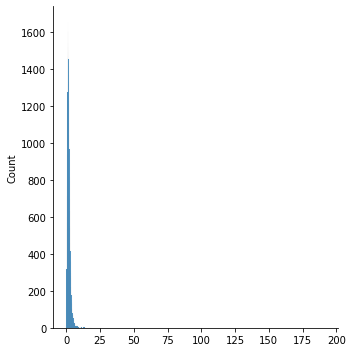

In [17]:
import seaborn as sns 
sns.displot(x=distances.mean(axis=1))

In [37]:
outlier_index = np.where(distances.mean(axis=1) > 7)
len(outlier_index[0])

442

In [38]:
y_hat = np.zeros(len(y)) 
y_hat[outlier_index[0]] = 1 

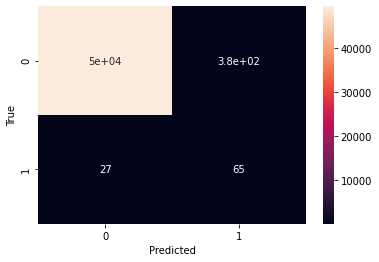

In [39]:
from utils import cf_matrix

cf_matrix(y, y_hat)


In [40]:
from utils import clf_report 
clf_report(y, y_hat)

Accuracy :  0.99192
Precision : 0.14705882352941177
Recall : 0.7065217391304348
F1 :  0.24344569288389514


We take the distance $l^2$ and we increase the number of neighbors, it is clear that the model can not have a better performance than a supervised model since the latter from the target variable identifies the weight and the most important variables in the determination of an anomaly. The model detects 70% of the frauds with the optimized parameters, the precision is less good than a supervised model, but generally, we try to decrease the number of false negatives. 

### Density based methods

Local Outlier Factor (LOF) : unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. 

- We use `sklearn.neighbors.LocalOutlierFactor`(https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html) to compute anomalies on the first 1000 instances of df (1 inlier, -1 outlier). 
- We visualize the results on a confusion matrix

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method that calculates the local density deviation of a data point from its neighbors. LOF considers samples with a density significantly lower than their neighbors as atypical values.

The distance calculated by the k nearest neighbors method is used to estimate the local density of a sample. 

Model parameters: 

<b> n_neighbors: </b> is the number of neighbors. The number of neighbors is chosen to be greater than the minimum number of samples that a cluster must contain, so that other samples can be local outliers with respect to that cluster, and less than the maximum number of nearby samples that can potentially be local outliers. In practice, a parameter of 20 generally works well.

<b>contamination: </b> The percentage of anomalous observations between 0 and 0.5.In the method paper, it is also possible to choose an automatic determination method. 

<b> Algorithm: </b> algorithm used in the search for anomalies. 

<b> Distance: </b> The method to calculate the distance, such as $l^2$ or $l^1$, cosine distance, ...





In [158]:
features_cols = ["Norm_amount"] + [col for col in df.columns if col.startswith("V")]

X = df_sample[features_cols]
y = df_sample["Class"]

In [180]:
from sklearn.neighbors import LocalOutlierFactor
# Predict the labels (1 inlier, -1 outlier)
y_pred = LocalOutlierFactor(n_neighbors=50, metric="l2", contamination="auto").fit_predict(X) 

In [181]:
# Replace prediction values so that we have the same conventions (1 : outlier / fraud, 0 : normal transaction)
y_pred = (2 - y_pred)//2

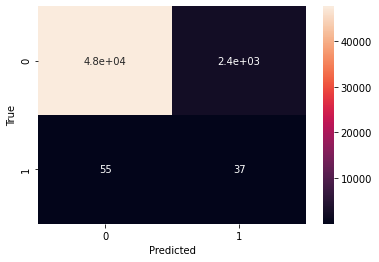

In [182]:
from utils import cf_matrix

cf_matrix(y, y_pred)

In [183]:
from utils import clf_report
clf_report(y, y_pred) 

Accuracy :  0.9517
Precision : 0.01543596161869003
Recall : 0.40217391304347827
F1 :  0.029730815588589792


After testing several values of the number of neighbors, since this number depends on the problem, we choose a number of neighbors equal to 50, the chosen distance is $l^2$ and the automatic contamination, the detection is not complete of all the anomalies, moreover, the false positives are numerous. The detection is not as good as the supervised model, the model can not identify the parameters that play the most on the quality of the model as in the supervised case. The recall is low with a detection of 40% of the frauds, and the precision is 1%.

### Clustering based methods

#### DBSCAN

- We try the DBSCAN algorithm for different values of epsilon and min_samples for the first 1000 instances of df (see `sklearn.cluster.DBSCAN`)
- We see how many frauds are classified as outliers by the DBSCAN algorithm.

DBSCAN is a clustering algorithm that groups points close to each other based on a distance measure (usually Euclidean) and a minimum number of points. It also marks points located in low density regions as anomalies.

We define the most important parameters for tuning the DBSCAN model:

<b>eps:</b> The maximum distance between two samples for one to be considered in the neighborhood of the other.

<b>min_samples:</b> The minimum number of neighbors a given point must have to be classified as a center point in the algorithm. The point itself is included in the minimum number of samples. The larger or noisier the data set, the higher the value of min_samples should be.

<b>metric:</b> The metric to use when calculating the distance between instances in an array of features.

Too small a value of epsilon and/or too large a value of min_samples may prevent the algorithm from propagating clusters. Conversely, too large a value for epsilon and/or too small a value for min_samples can lead the algorithm to return only noise.

In [48]:
from sklearn.cluster import DBSCAN

features_cols = ["Norm_amount"] + [col for col in df.columns if col.startswith("V")]

X = df_sample[features_cols]
y = df_sample["Class"] 

db = DBSCAN(eps=5, min_samples=20, n_jobs=-1).fit(X)

In [49]:
set(db.labels_)

{-1, 0}

In [50]:
print("Cluster    |    Number of points       |      Number frauds in identified cluster")
for c in set(db.labels_):
  print("{:^10d} | {:^25d} | {:^23d}".format(c, np.sum(db.labels_==c), y[db.labels_==c].sum()))

Cluster    |    Number of points       |      Number frauds in identified cluster
    0      |           48882           |           13           
    -1     |           1118            |           79           


In [53]:
y_pred = np.zeros(len(y)) 
y_pred[db.labels_==-1] = 1  

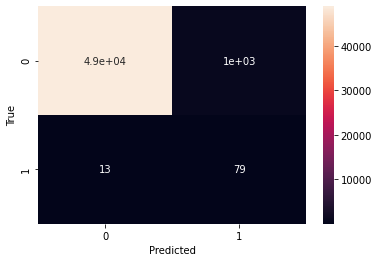

In [54]:
from utils import cf_matrix
cf_matrix(y, y_pred)

In [55]:
from utils import clf_report

clf_report(y, y_pred) 

Accuracy :  0.97896
Precision : 0.0706618962432916
Recall : 0.8586956521739131
F1 :  0.13057851239669424


After testing several values of epsilon and the average number of samples, if we take the class with the least number of observations as the fraud class, then we detect 85% of the anomalies, the model has a good performance compared to the kNN. 





### Isolation forest

- We use the `sklearn.ensemble.IsolationForest` model (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to compute anomalies in the credit card fraud dataset.
- We analyze the results using a confusion matrix

The isolation forest is based on the principle of the decision tree algorithm. It isolates outliers by randomly selecting a variable from the given set of variables and then randomly selecting a split value between the maximum and minimum values of the selected variable. This random partitioning of features will produce smaller paths in the trees for the anomalous data values and distinguish them from the normal data set. In fact, the anomalies need fewer random partitions to be isolated from the normal data points in the data set. Therefore, the anomalies will be the points that have a shorter path through the tree.

<b>n_estimators:</b> The number of decision trees in the forest. According to the paper, 100 decision trees are sufficient. 

<b>max_samples:</b> The number of samples to draw to train each decision tree, we won't use this, because we don't have a large training sample. 

<b>max_features:</b> The number of variables to use to define outliers, in our case we take all variables. 

<b>contamination:</b> The proportion of the data that are identified as outliers.

In [137]:
from sklearn.ensemble import IsolationForest

features_cols = ["Amount"] + [col for col in df.columns if col.startswith("V")]

X = df_sample[features_cols]
y = df_sample['Class']

# la proportion de données aberrantes est de 2%
model = IsolationForest(n_estimators=100, contamination=0.02, max_samples=1., n_jobs=-1) 
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.02,
                max_features=1.0, max_samples=1.0, n_estimators=100, n_jobs=-1,
                random_state=None, verbose=0, warm_start=False)

In [138]:
y_pred = model.predict(X) 

In [139]:
set(y_pred)  # 1 are inliers and -1 are outliers

{-1, 1}

In [140]:
y_pred = (2 - y_pred)//2

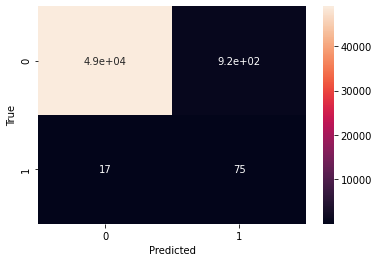

In [141]:
from utils import cf_matrix

cf_matrix(y, y_pred)

The isolation forest does not allow a complete detection of frauds, one can increase the percentage to include more anomalies, especially if one is mainly concerned with the discovery of frauds, and is not so concerned with false positives.

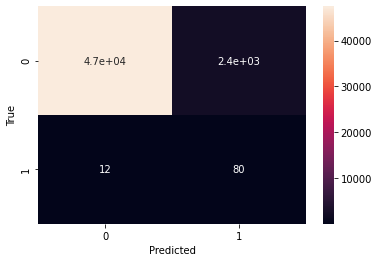

In [143]:
model = IsolationForest(n_estimators=100, contamination=0.05, max_samples=1., n_jobs=-1) 
model.fit(X)
y_pred = model.predict(X) 
y_pred = (2 - y_pred)//2
cf_matrix(y, y_pred)

If we increase the contamination to 5%, we can detect more fraudsters. The choice depends on what we are looking for in our model. 

# Model : autoencoder

- We use the keras library to define an autoencoder model. The model will have one input layer, one hidden layer, and one output layer. Use `adam` optimizer and `mse` loss. We will used an encoded dimension of size 10. See here for some examples : https://blog.keras.io/building-autoencoders-in-keras.html
- We fit the model with all the dataset observations
- We compute decoded observations (`X_out`) and use the euclidean distance to compute the reconstruction error.
- We choose a threshold and compute `y_pred` such as y_pred[i]=1 if i is an outlier (i.e. the reconstruction error is greater than the thresold), and y_pred[i]=0 otherwise.
- We visualize the results on a confusion matrix comparing `y` and `y_pred`


## Define the Keras model

Autoencoders are generally used when one seeks to compress information from a large dimension to a smaller one. An encoder is used to move from a larger dimension to a smaller dimension, and the decoder is used to recover the original information. In the case of anomaly detection, if the data is difficult to recover using the encoder, then the data probably has an anomaly. Indeed, the greater the difference between the information recovered by the output and the input, which are the same if the reconstruction is perfect, the greater the probability that the observation corresponds to an anomaly. 

Parameters to optimize: 

<b>The number of layers:</b> The number of layers in the neural network. The neural network must be symmetric when creating the autoencoder.

<b>optimizer:</b> The optimization applied when applying the gradient descent algorithm. We choose Adam, we keep the default rate. 

<b> activation function:</b> The activation function is applied after the linear transformation of each layer. We choose elu, which is continuous, because we try to get as close as possible to the output data. Elu is used during the calibration of the functions. 

<b>batch_size:</b> the number of samples used in each step of the training and in the calculation of the loss for updating the neural network parameters, allows to optimize the training time especially when a GPU is used.

<b>threshhold:</b> The minimum score to consider an observation as an anomaly.

After testing and validation on the data to be trained, we chose to use elu as the activation function and not to use an activation function at the output of the neural network because the data can take any value and are not between 0 and 1. We added an early stop to end the training when the score cannot be improved, and we take a batch_size of 128. After testing several architectures, we find that the architecture with three hidden layers is the most suitable: 


encoder: 29->8->4

decoder: 4->8->29

In [8]:
features_cols = ["Norm_amount"] + [col for col in df.columns if col.startswith("V")]

X = df_sample[features_cols]
y = df_sample["Class"]

<AxesSubplot:>

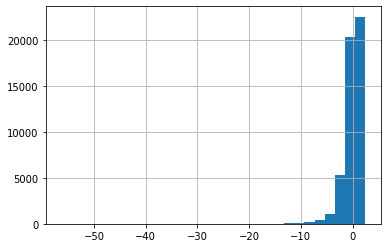

In [6]:
X.iloc[:, 1].hist(bins=30)

In [114]:
from utils import network

autoencoder = network(dims=[8, 4, 8])

In [115]:
autoencoder.compile(optimizer='adam', loss='mse')

In [116]:
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 29)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 240       
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_39 (Dense)             (None, 29)                261       
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [117]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = autoencoder.fit(X, X, 
                batch_size=128, epochs=512, 
                shuffle=True, validation_split=0.20, 
                callbacks=[es])

Epoch 1/512
313/313 [==============================] - 2s 4ms/step - loss: 1.0375 - val_loss: 0.8890
Epoch 2/512
313/313 [==============================] - 1s 2ms/step - loss: 0.8278 - val_loss: 0.7827
Epoch 3/512
313/313 [==============================] - 1s 2ms/step - loss: 0.8002 - val_loss: 0.7315
Epoch 4/512
313/313 [==============================] - 1s 2ms/step - loss: 0.7954 - val_loss: 0.7034
Epoch 5/512
313/313 [==============================] - 1s 2ms/step - loss: 0.7081 - val_loss: 0.6827
Epoch 6/512
313/313 [==============================] - 1s 2ms/step - loss: 0.6857 - val_loss: 0.6659
Epoch 7/512
313/313 [==============================] - 1s 2ms/step - loss: 0.6604 - val_loss: 0.6544
Epoch 8/512
313/313 [==============================] - 1s 2ms/step - loss: 0.6361 - val_loss: 0.6427
Epoch 9/512
313/313 [==============================] - 1s 2ms/step - loss: 0.6334 - val_loss: 0.6333
Epoch 10/512
313/313 [==============================] - 1s 2ms/step - loss: 0.6200 - val_lo

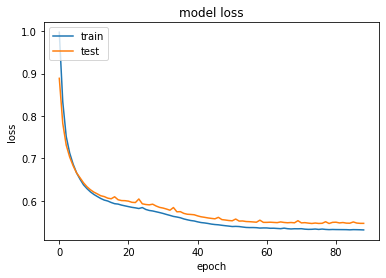

In [118]:
from utils import loss
loss(history)

## Compute predictions

In [119]:
X_out = autoencoder.predict(X)

In [120]:
scores = ((X - X_out)**2).mean(axis=1)

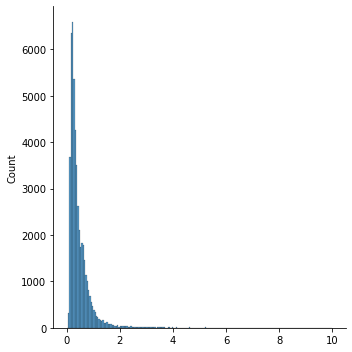

In [121]:
import seaborn as sns
sns.displot(scores, kind='hist', bins=200, binrange=(0, 10))

In [124]:
thresh = 3
y_pred = 1*(scores >= thresh)

## Evaluate predictions

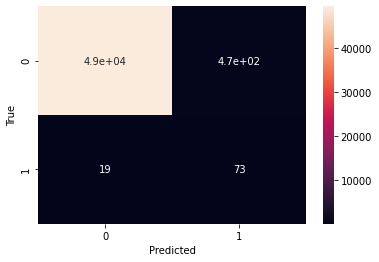

In [125]:
from utils import cf_matrix

cf_matrix(y, y_pred)

In [126]:
from utils import clf_report
clf_report(y, y_pred) 

Accuracy :  0.99028
Precision : 0.13518518518518519
Recall : 0.7934782608695652
F1 :  0.23101265822784808


We detect a large proportion of frauds, but, we also have a large proportion of false positives, generally, low precision is not the priority in detecting fraud, but to detect as many fraudsters as possible, so we try to have a large recall, optimizing the precision, so the model has a good performance for an unsupervised model. 